# Reading Data

In [1]:
# imports
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# configurations
class Config:
    iris_datapath = Path('../data/iris.data')

In [3]:
# reading the dataset
iris_dataframe = pd.read_csv(Config.iris_datapath, 
                             names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

In [4]:
# printing head
iris_dataframe.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Problem 1

In [5]:
classes = list(iris_dataframe['class'].unique())
print(f'Classes in iris dataset: {classes}')

Classes in iris dataset: ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


In [6]:
# lets pick the 'Iris-virginica' class for the problem 
iris_class = classes[2]
print(f'Class picked for the problem: {iris_class}')

Class picked for the problem: Iris-virginica


In [7]:
iris_virginica_df = iris_dataframe[iris_dataframe['class'] == iris_class].reset_index(drop=True)
iris_virginica_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,6.3,3.3,6.0,2.5,Iris-virginica
1,5.8,2.7,5.1,1.9,Iris-virginica
2,7.1,3.0,5.9,2.1,Iris-virginica
3,6.3,2.9,5.6,1.8,Iris-virginica
4,6.5,3.0,5.8,2.2,Iris-virginica


In [8]:
# lets pick the attribute petal_length for this problem
iris_attr = iris_virginica_df.columns[2]
petal_length_column = iris_dataframe[iris_attr]
print(f'Attribute picked for this problem: {iris_attr}')

Attribute picked for this problem: petal_length


In [9]:
def evaluate_mean(vals):
    count = vals.shape[0]
    summation = 0
    
    for i in vals:
        summation += i
        
    mean = summation / count
    return mean

In [10]:
def evaluate_std(vals):
    count = vals.shape[0]
    mean = evaluate_mean(vals)
    variance = 0
    
    for i in vals:
        variance += (i-mean)**2
        
    variance /= count
    std = np.sqrt(variance)
    return std

In [11]:
# calculating mean
petal_length_mean = evaluate_mean(petal_length_column)
print(f'Mean of petal length: {petal_length_mean}')

Mean of petal length: 3.7586666666666693


In [12]:
# calculating standard deviation
petal_length_std = evaluate_std(petal_length_column)
print(f'Standard deviation of petal length: {petal_length_std}')

Standard deviation of petal length: 1.7585291834055201


In [13]:
def normal_distribution(x, mean, std):
    return 1/(std*np.sqrt(np.pi)) * np.power(np.e, (-1/2)*(((x-mean)/std)**2))

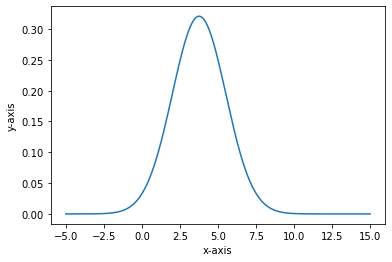

In [14]:
# ploting normal distribution
low_x = -5
high_x = 15
plot_pt_count = int(1e3)
delta = (high_x-low_x) / plot_pt_count

norm_distr_values = list()
plot_pts = list()
while low_x <= high_x:
    plot_pts.append(low_x)
    norm_distr_values.append(normal_distribution(low_x, petal_length_mean, petal_length_std))
    low_x += delta
    
plt.plot(plot_pts, norm_distr_values)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

In [15]:
# finding minimum and maximum
min_petal_length = min(petal_length_column)
max_petal_length = max(petal_length_column)

In [16]:
def uniform_distribution(x, min_val, max_val):
    if min_val < x and x < max_val:
        return 1 / (max_val-min_val)
    return 0

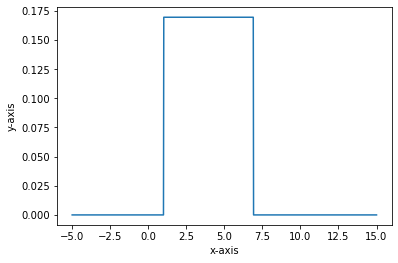

In [17]:
# ploting normal distribution
low_x = -5
high_x = 15
plot_pt_count = int(1e3)
delta = (high_x-low_x) / plot_pt_count

uniform_distr_values = list()
plot_pts = list()
while low_x <= high_x:
    plot_pts.append(low_x)
    uniform_distr_values.append(uniform_distribution(low_x, min_petal_length, max_petal_length))
    low_x += delta
    
plt.plot(plot_pts, uniform_distr_values)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

In [18]:
def exponential_distribution(x, λ):
    if x >= 0:
        return λ * np.power(np.e, -λ*x)
    return 0

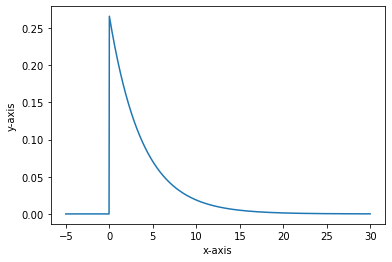

In [19]:
# ploting exponential distribution
low_x = -5
high_x = 30
plot_pt_count = int(1e3)
delta = (high_x-low_x) / plot_pt_count
λ = 1/petal_length_mean

expo_distr_values = list()
plot_pts = list()
while low_x <= high_x:
    plot_pts.append(low_x)
    expo_distr_values.append(exponential_distribution(low_x, λ))
    low_x += delta
    
plt.plot(plot_pts, expo_distr_values)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

In [20]:
def factorial(x):
    if x==1 or x==0:
        return 1
    return x*factorial(x-1)

In [21]:
def poisson_distribution(x, λ):
    return (np.power(np.e, -λ)*np.power(λ, x)) / factorial(np.floor(x))

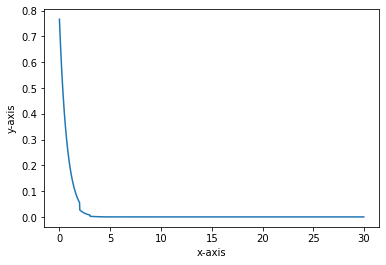

In [22]:
# ploting exponential distribution
low_x = 0
high_x = 30
plot_pt_count = int(1e3)
delta = (high_x-low_x) / plot_pt_count
λ = 1/petal_length_mean

poisson_distr_values = list()
plot_pts = list()
while low_x <= high_x:
    plot_pts.append(low_x)
    poisson_distr_values.append(poisson_distribution(low_x, λ))
    low_x += delta
    
plt.plot(plot_pts, poisson_distr_values)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

# Problem 2

## Mean

In [23]:
# using function written in problem 1
petal_length_mean = evaluate_mean(petal_length_column)
print(f'Mean petal length: {petal_length_mean}')

Mean petal length: 3.7586666666666693


In [24]:
# Median
def evaluate_median(vals):
    n = vals.shape[0]
    if n%2==1:
        return vals.iloc[n//2]
    return (vals.iloc[n//2] + vals[(n+1)//2]) / 2

In [25]:
petal_length_median = evaluate_median(petal_length_column)
print(f'Median petal length: {petal_length_median}')

Median petal length: 4.4


In [26]:
petal_length_std = evaluate_std(petal_length_column)
print(f'Standard deviation petal length: {petal_length_std}')

Standard deviation petal length: 1.7585291834055201


In [27]:
petal_length_variance = petal_length_std**2
print(f'petal length: {petal_length_variance}')

petal length: 3.0924248888888854


In [28]:
petal_length_skewness = (3*(petal_length_median-petal_length_mean)) / petal_length_std
print(f'Skewness petal length: {petal_length_skewness}')

Skewness petal length: 1.0940961447532118


In [29]:
count = petal_length_column.shape[0]
kurtosis = 0

for i in petal_length_column:
    kurtosis += ((i-petal_length_mean)/petal_length_std)**4

kurtosis /= count

print(f'Kurtosis petal length: {kurtosis}')

Kurtosis petal length: 1.6046406978602903


# Problem 3

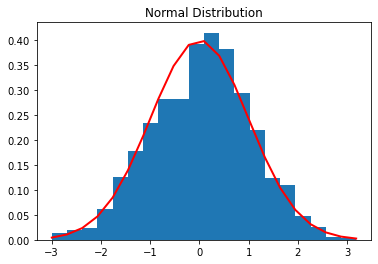

In [30]:
mean, variance = 0, 1

data = np.random.normal(mean, variance, 1000)
count, bins, ignored = plt.hist(data, 20, density=1)
plt.plot(bins, 
    1/(variance * np.sqrt(2 * np.pi)) * np.exp( - (bins - mean)**2 / (2 * variance**2) ),
    linewidth=2,
    color='r')

plt.title('Normal Distribution')
plt.show()